# Topic Modeling Classwork

## Importing required libraries and data

In [1]:
# Import the pandas library, which is a popular data manipulation and analysis library in Python
import pandas as pd

# Specify the file path of the CSV file you want to read
file = "D:\\Text Based Analysis Sem 2\\un-general-debates-blueprint.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame
df.head(20)

C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

# Look at a couple of texts

In [2]:
# Print the first 400 characters of the "text" column for the row at index 2666
print(repr(df.iloc[2666]["text"][0:400]))

# Print the first 400 characters of the "text" column for the row at index 4726
print(repr(df.iloc[4726]["text"][0:400]))

'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


# Split speech into sentences

In [3]:
# Import the re (regular expression) module
import re
# Apply a lambda function to the "text" column
# The lambda function splits the text into paragraphs using the regular expression pattern '\.\s*\n'
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
# Create a new column "number_of_paragraphs"
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# TFIDF

In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words='english',
min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the DataFrame and transform it into a sparse matrix
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
# Print the shape of the resulting sparse matrix
tfidf_text_vectors.shape

(7507, 24604)

# Data frame of sentences

In [6]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["year"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text  year
0  33: May I first convey to our President the co...  1970
1  35.\tThe utilization of the United Nations to ...  1970
2  36.\tThe whole of progressive mankind recalls ...  1970
3  37.\tAll this has had well known consequences ...  1970
4  38.\tOne of the undeniable proofs that the Uni...  1970
5  39.\tUndoubtedly, such a state of affairs in t...  1970
6  40.\tThe liberation movement at the world leve...  1970
7  41.\tPanic-stricken at the impetuous growth of...  1970
8  42.\tAlthough split by numerous contradictions...  1970
9  43.\tIn that connexion we can cite, simultaneo...  1970

# TFIDF of the sentences DF

In [7]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the paragraph_df DataFrame and transform it into a sparse matrix
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
# Print the shape of the resulting sparse matrix
tfidf_para_vectors.shape

(279076, 25156)

# NMF

In [8]:
# Import the NMF class from the sklearn.decomposition module
from sklearn.decomposition import NMF

In [9]:
# Create an instance of the NMF class with 10 components (topics) and a random state of 42
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the tfidf_text_vectors (document-term matrix) and transform it to obtain the document-topic matrix
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)

# Get the topic-word matrix from the fitted NMF model
H_text_matrix = nmf_text_model.components_

# Let's Look at our 10 topics:

In [10]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]]*100.0/total)))
            
# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())
    


Topic 00
 nuclear (1.04)
 weapons (0.55)
 disarmament (0.53)
 operation (0.39)
 treaty (0.36)

Topic 01
 terrorism (0.36)
 challenges (0.31)
 cooperation (0.30)
 reform (0.29)
 sustainable (0.29)

Topic 02
 africa (0.90)
 south (0.60)
 african (0.56)
 namibia (0.37)
 delegation (0.30)

Topic 03
 arab (0.99)
 israel (0.86)
 palestinian (0.59)
 lebanon (0.54)
 israeli (0.53)

Topic 04
 american (0.27)
 latin (0.27)
 america (0.27)
 panama (0.17)
 bolivia (0.16)

Topic 05
 pacific (1.53)
 islands (1.25)
 island (0.87)
 solomon (0.86)
 fiji (0.70)

Topic 06
 republic (0.84)
 viet (0.72)
 nam (0.67)
 socialist (0.55)
 soviet (0.54)

Topic 07
 guinea (4.37)
 equatorial (1.79)
 bissau (1.55)
 papua (1.52)
 portugal (0.53)

Topic 08
 european (0.81)
 europe (0.57)
 turkey (0.55)
 cyprus (0.51)
 greece (0.43)

Topic 09
 caribbean (0.93)
 small (0.62)
 bahamas (0.60)
 saint (0.59)
 barbados (0.57)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have tfidf_text_vectorizer defined

# Get feature names from the TfidfVectorizer object
feature_names = tfidf_text_vectorizer.get_feature_names_out()

# Now, use the display_topics function with the correct feature names
display_topics(nmf_text_model, feature_names)


Topic 00
 nuclear (1.04)
 weapons (0.55)
 disarmament (0.53)
 operation (0.39)
 treaty (0.36)

Topic 01
 terrorism (0.36)
 challenges (0.31)
 cooperation (0.30)
 reform (0.29)
 sustainable (0.29)

Topic 02
 africa (0.90)
 south (0.60)
 african (0.56)
 namibia (0.37)
 delegation (0.30)

Topic 03
 arab (0.99)
 israel (0.86)
 palestinian (0.59)
 lebanon (0.54)
 israeli (0.53)

Topic 04
 american (0.27)
 latin (0.27)
 america (0.27)
 panama (0.17)
 bolivia (0.16)

Topic 05
 pacific (1.53)
 islands (1.25)
 island (0.87)
 solomon (0.86)
 fiji (0.70)

Topic 06
 republic (0.84)
 viet (0.72)
 nam (0.67)
 socialist (0.55)
 soviet (0.54)

Topic 07
 guinea (4.37)
 equatorial (1.79)
 bissau (1.55)
 papua (1.52)
 portugal (0.53)

Topic 08
 european (0.81)
 europe (0.57)
 turkey (0.55)
 cyprus (0.51)
 greece (0.43)

Topic 09
 caribbean (0.93)
 small (0.62)
 bahamas (0.60)
 saint (0.59)
 barbados (0.57)


# Run Same Model

In [12]:
# Import the NMF (Non-Negative Matrix Factorization) class from the sklearn.decomposition module
nmf_para_model = NMF(n_components=10, random_state=42)
# Fit the NMF model to the TF-IDF vectors of the paragraphs
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
# Get the topic-word matrix (H) from the trained model
H_para_matrix = nmf_para_model.components_
# Display the topics with their top words
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 international (2.01)
 world (1.50)
 community (0.91)
 new (0.76)
 peace (0.67)

Topic 01
 general (2.88)
 session (2.85)
 assembly (2.83)
 mr (2.00)
 president (1.83)

Topic 02
 countries (4.41)
 developing (2.49)
 economic (1.51)
 developed (1.35)
 trade (0.92)

Topic 03
 nations (5.61)
 united (5.50)
 organization (1.27)
 states (1.03)
 charter (0.93)

Topic 04
 nuclear (4.91)
 weapons (3.25)
 disarmament (2.01)
 treaty (1.70)
 proliferation (1.45)

Topic 05
 rights (6.51)
 human (6.20)
 respect (1.16)
 fundamental (0.86)
 universal (0.83)

Topic 06
 africa (3.80)
 south (3.30)
 african (1.70)
 namibia (1.38)
 apartheid (1.18)

Topic 07
 security (6.08)
 council (5.82)
 permanent (1.48)
 reform (1.47)
 peace (1.31)

Topic 08
 people (1.35)
 peace (1.32)
 east (1.28)
 middle (1.17)
 palestinian (1.15)

Topic 09
 development (4.51)
 sustainable (1.20)
 economic (1.07)
 social (1.00)
 goals (0.94)


# How "BIG" is each topic?

In [13]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([10.04128384, 16.66857283, 15.38093119, 10.36156837, 13.43233845,
        5.9943591 ,  7.56900484,  4.23304994,  9.05044908,  7.26844235])

# Topic sizes

In [14]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.99461472, 10.12384143, 10.13359996, 14.58547101,  6.74889346,
        7.06521386,  8.61823051,  8.23846492, 11.85285437, 10.63881575])

# Running Code

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(279076, 25156)

In [16]:
# Creating a Latent Dirichlet Allocation (LDA) model with 10 topics using the sklearn library.
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Transforming the count-based document-term matrix (count_para_vectors) into topic-document distribution matrix.
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Retrieving the topic-term distribution matrix from the trained LDA model.
H_lda_para_matrix = lda_para_model.components_

# Start by cutting the paragraphs into words:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
print(count_para_vectors.shape)


C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(279076, 25162)


# Run the LDA

In [18]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
terrified interminably workload pennsylvania want

Topic 2:
counties ecological devastatingly devastation workload

Topic 3:
noxious wealthier stated disappointments arms

Topic 4:
gotten counting pawns narrowly problems

Topic 5:
nationalities unique rightful secured hubs

Topic 6:
pennsylvania pawns africa soundness easier

Topic 7:
devastation interminably nationalities unique cooperated

Topic 8:
unique nationalities reprocessing pennsylvania gef

Topic 9:
assembly gef servile preserve movimento

Topic 10:
workload pawns interminably neutral ecological


# Topic Size

In [19]:
# Calculate the sum of probabilities for each topic across all documents.
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.87368301,  9.32476729,  7.39387874,  7.82248007, 12.34771748,
       14.14938375, 12.00439971,  7.07035884,  5.83646568, 15.17686543])

# Draw wordclouds for the 10 topics

In [20]:
# Enable inline plotting of matplotlib figures in Jupyter Notebook or JupyterLab.
%matplotlib inline
# Importing necessary libraries for word cloud visualization.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

# Adjusting the height of the output cell to accommodate larger word cloud images.
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# Define a function to generate and display word clouds for each topic in the LDA model.
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# The NMF Wordclouds:

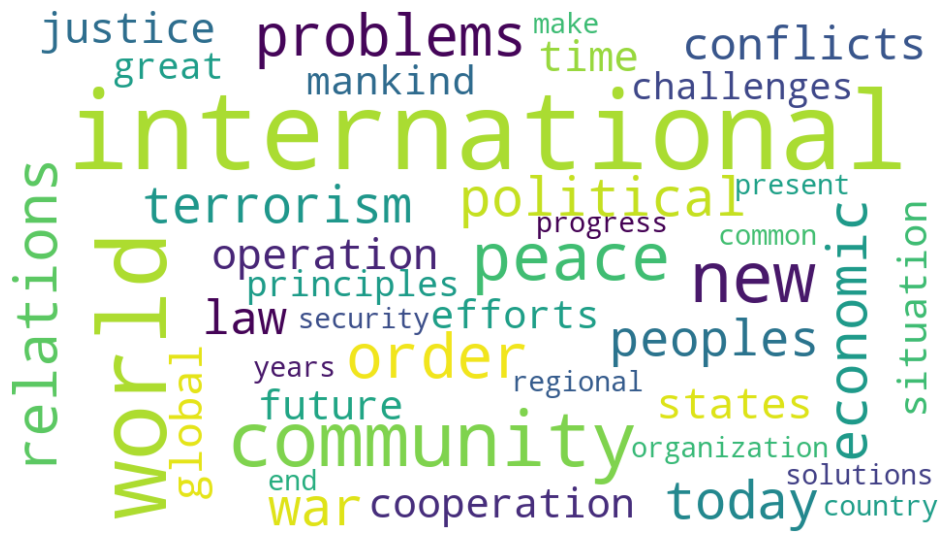

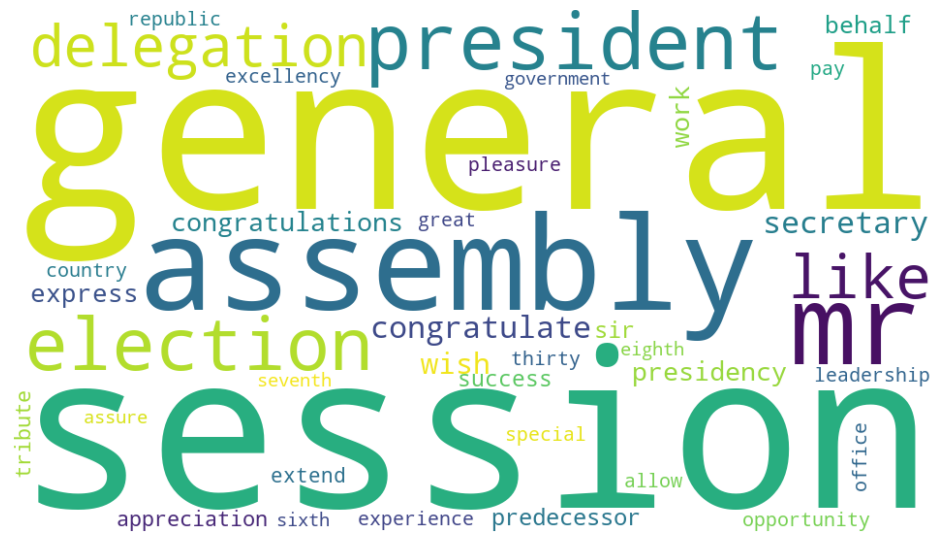

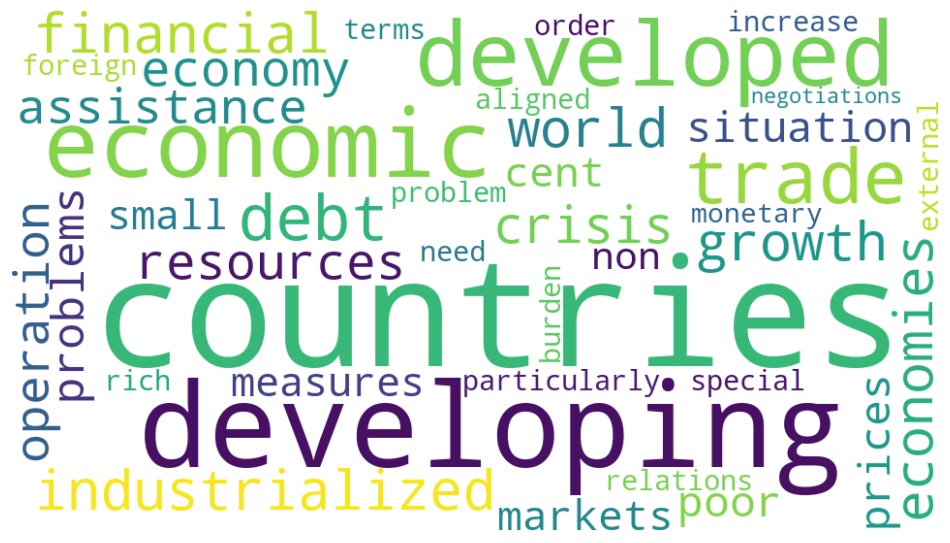

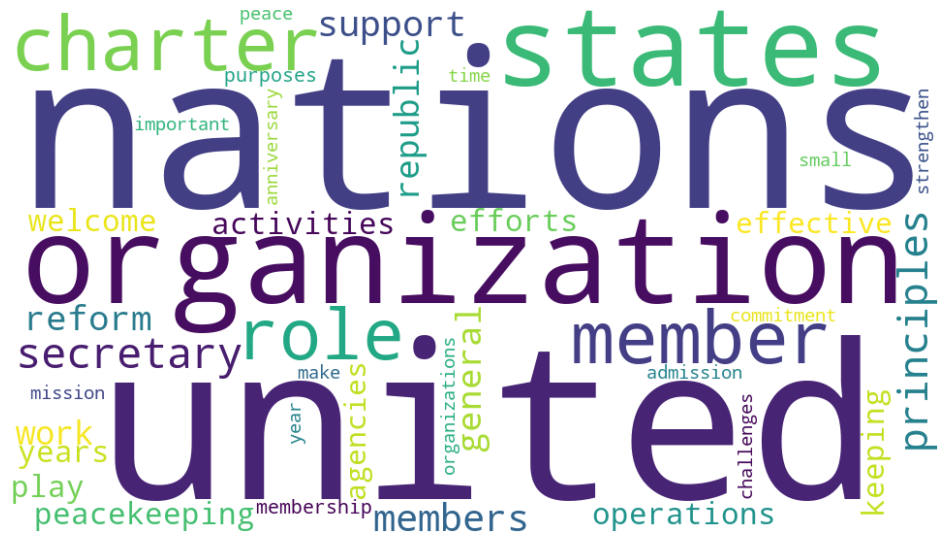

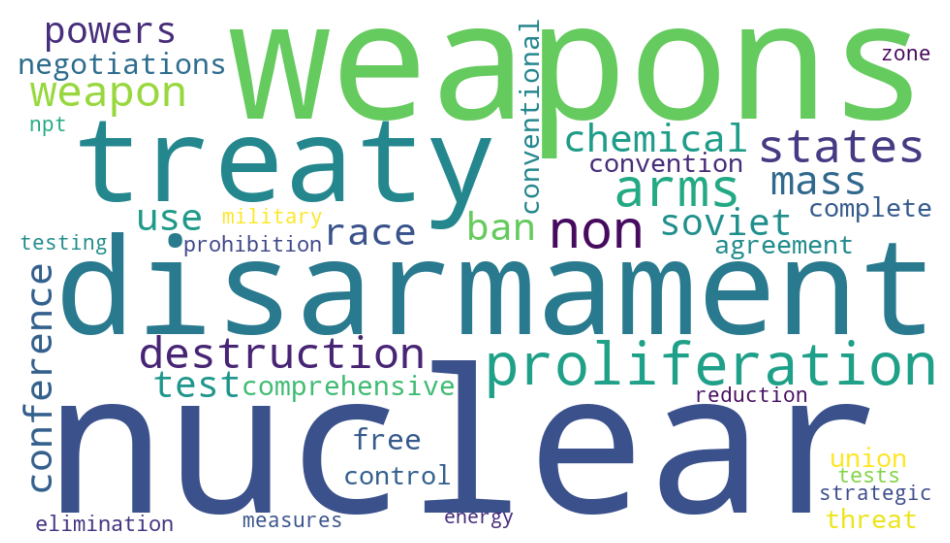

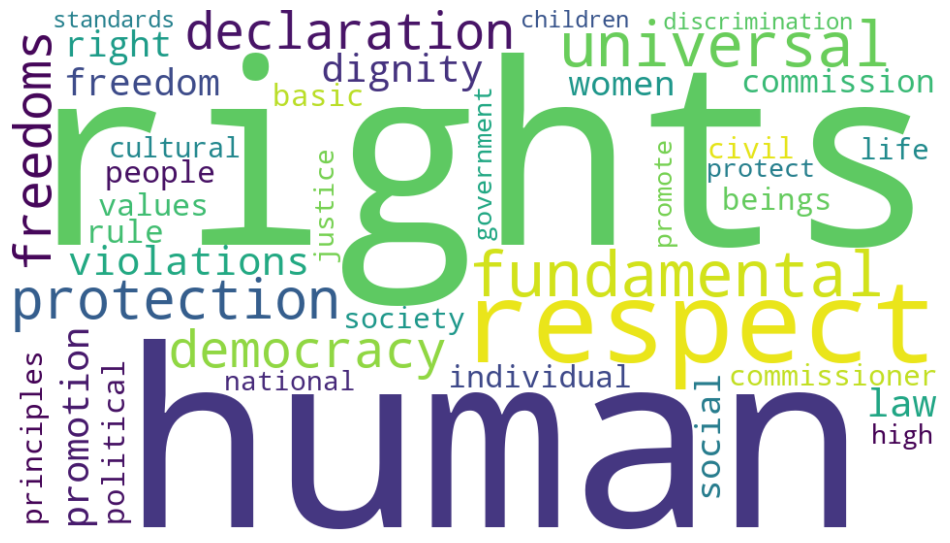

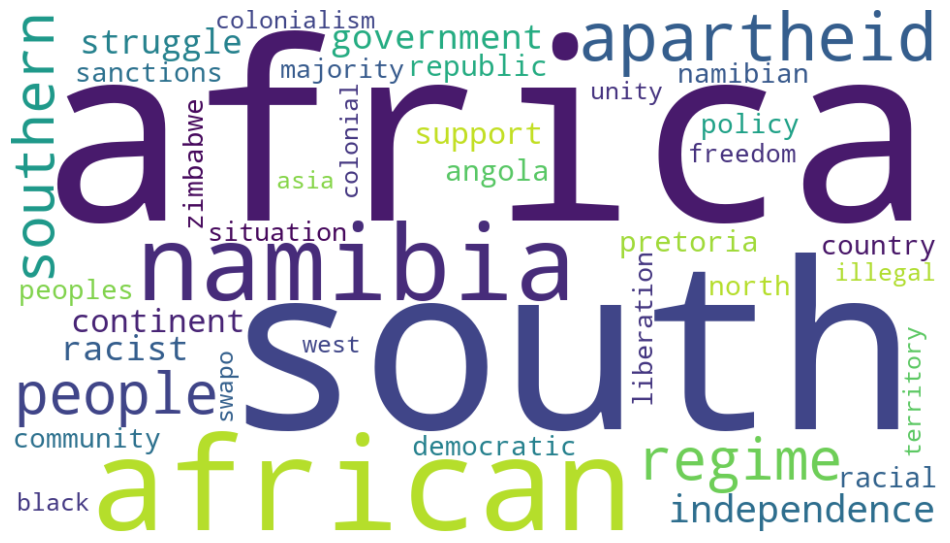

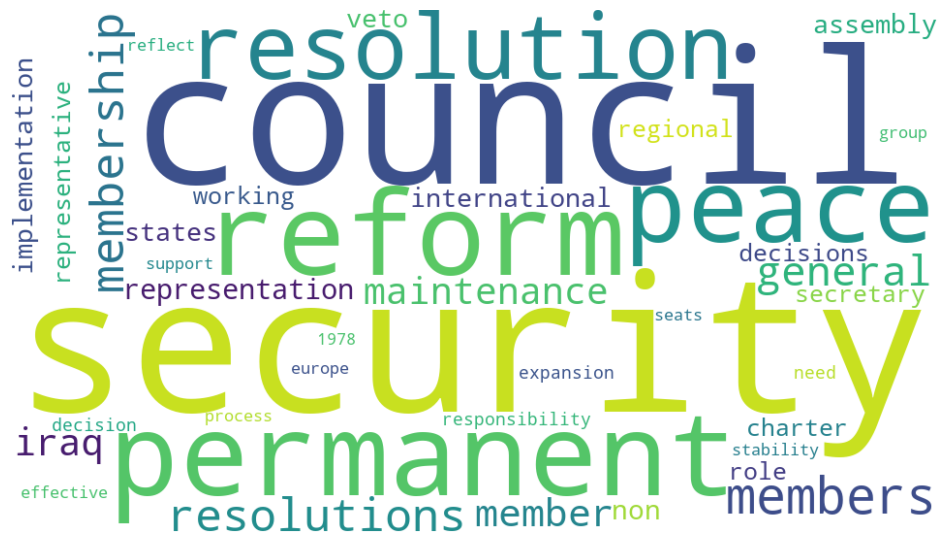

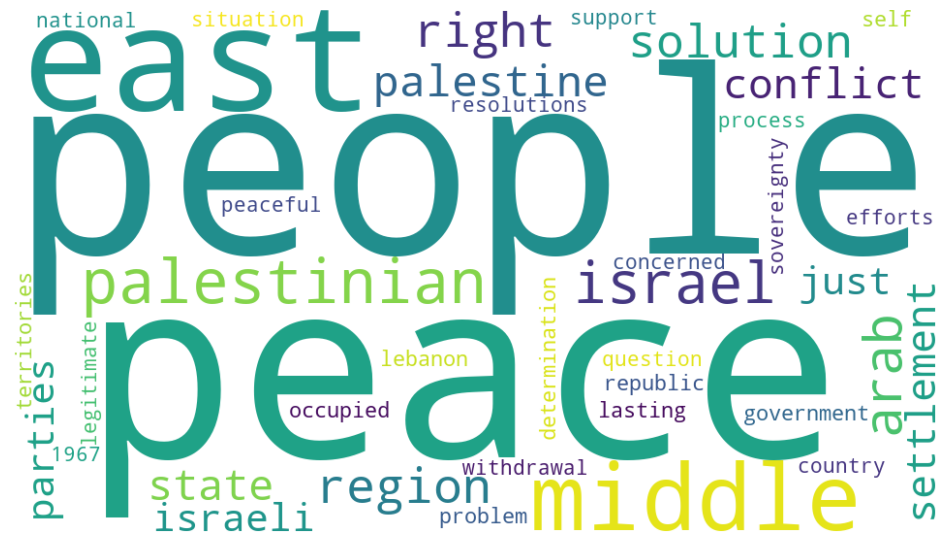

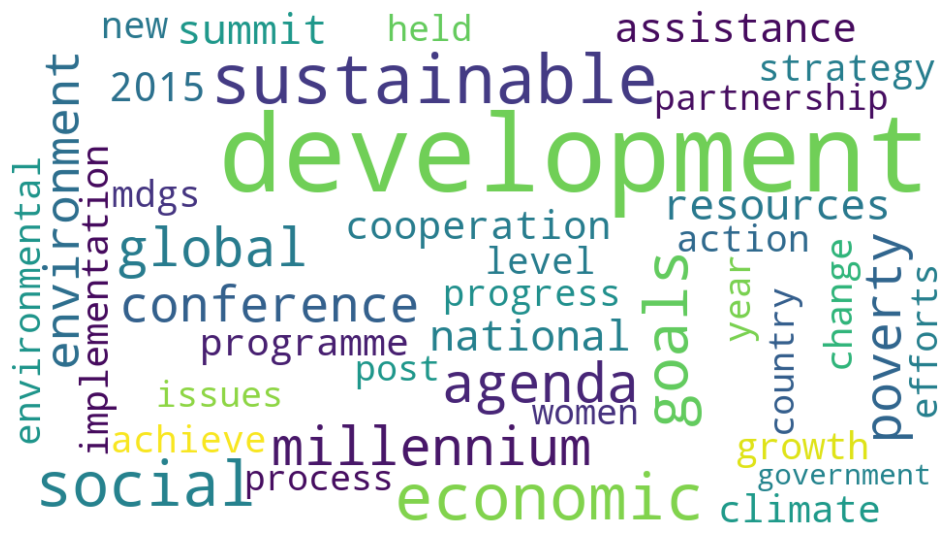

In [21]:
# Call the wordcloud_topics function with parameters
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

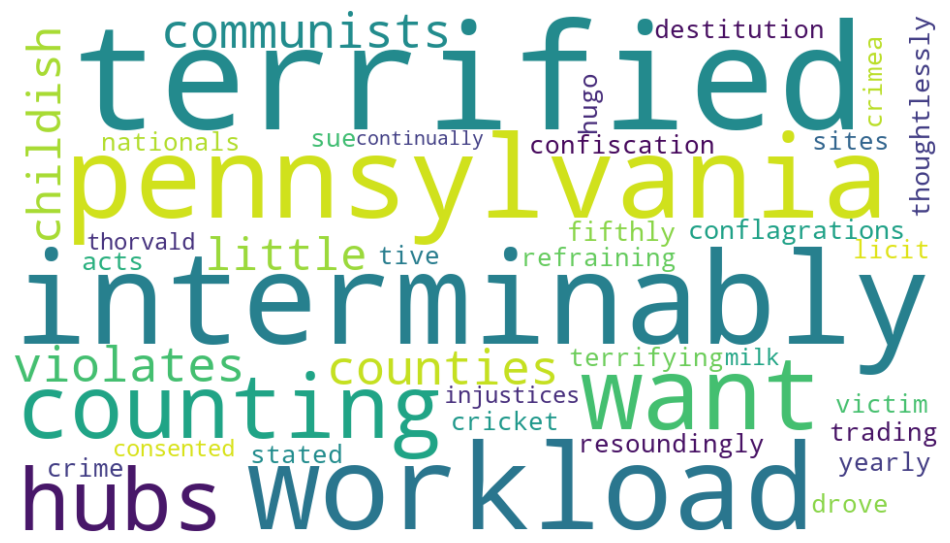

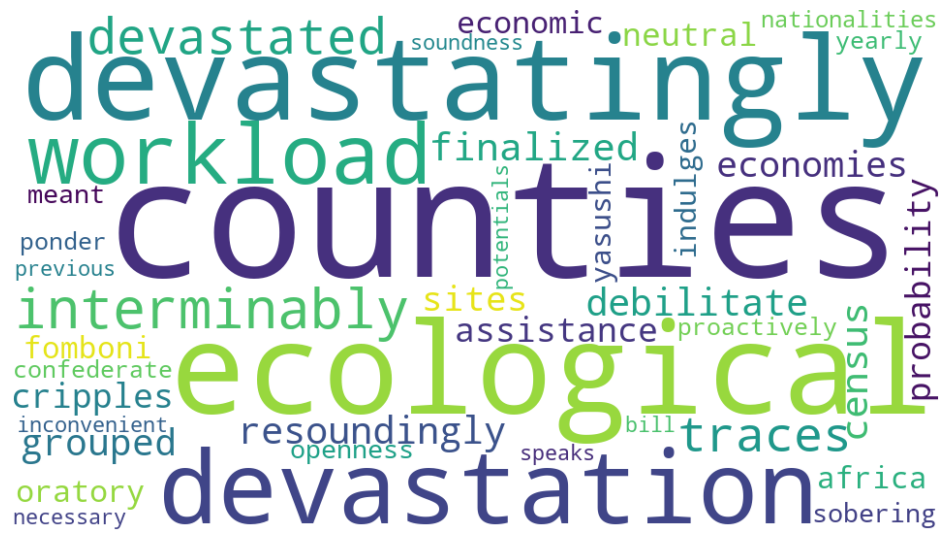

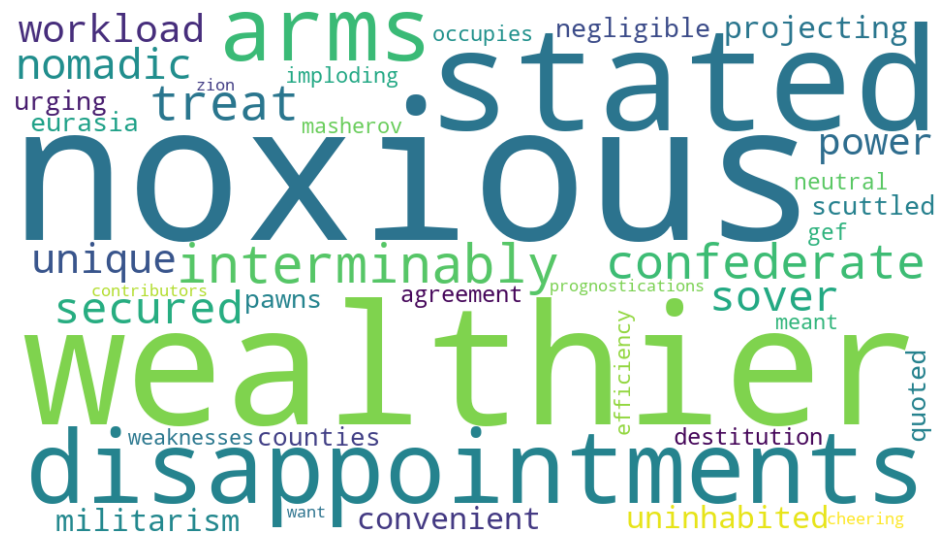

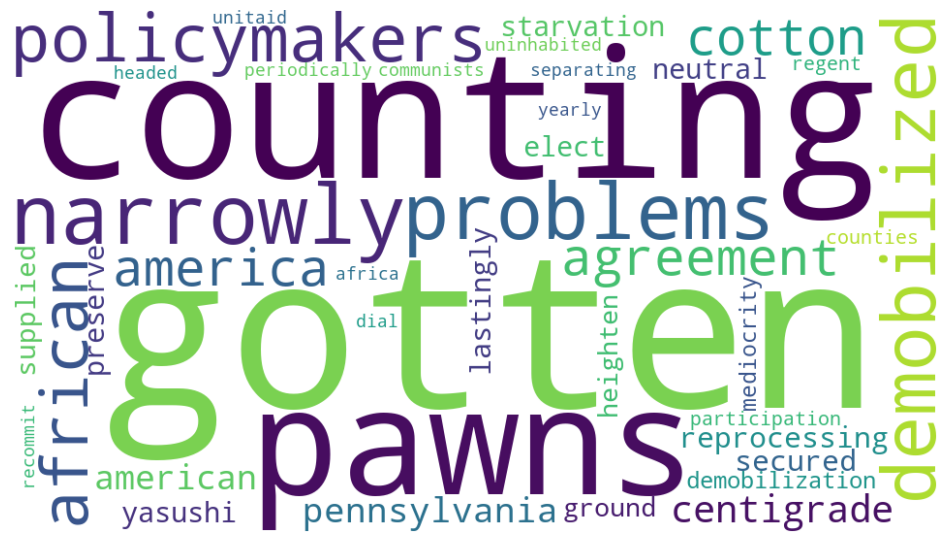

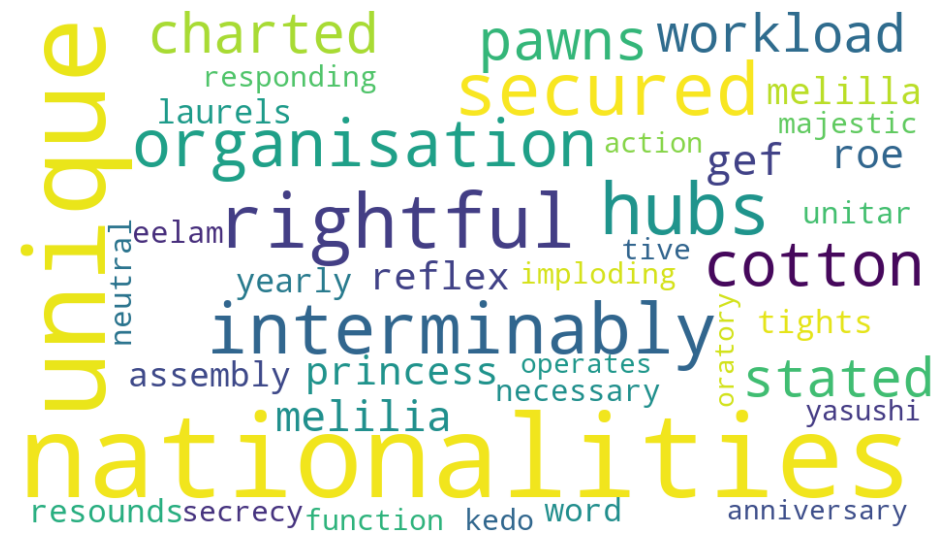

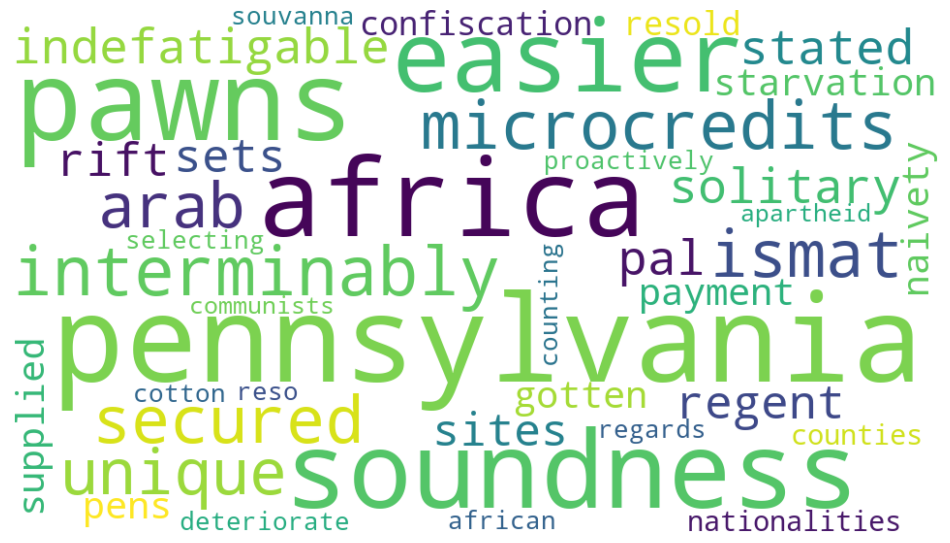

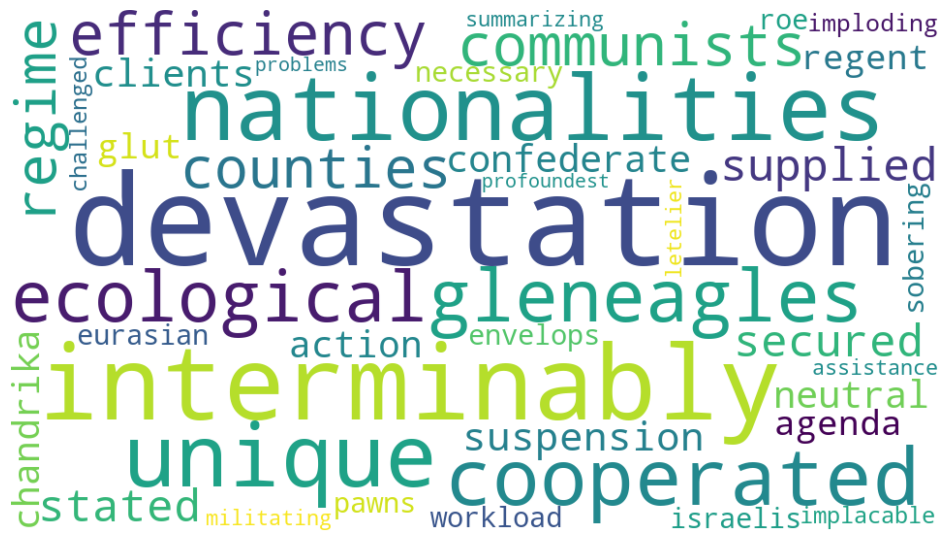

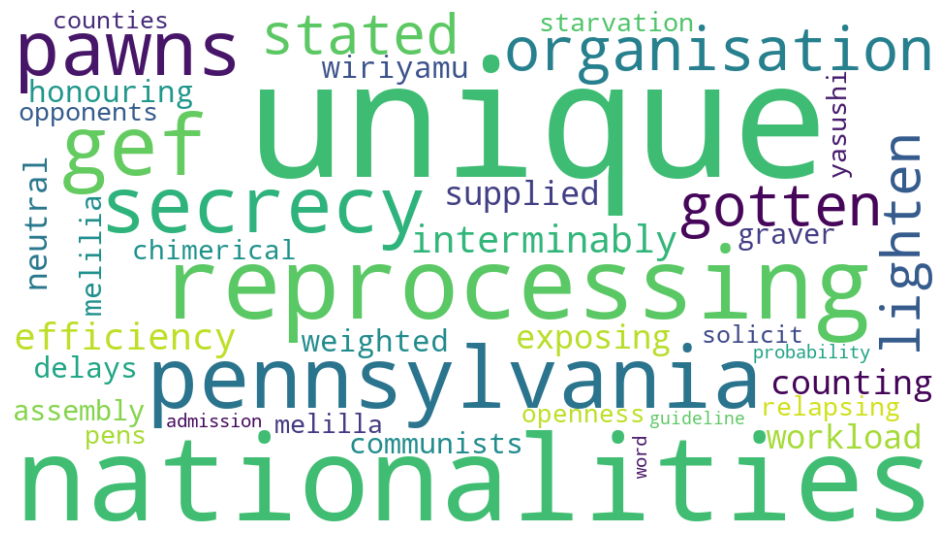

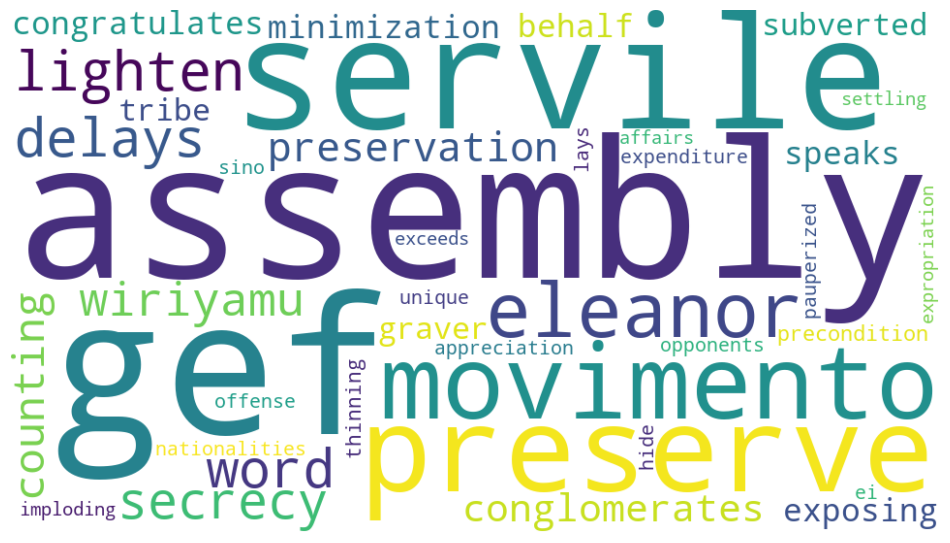

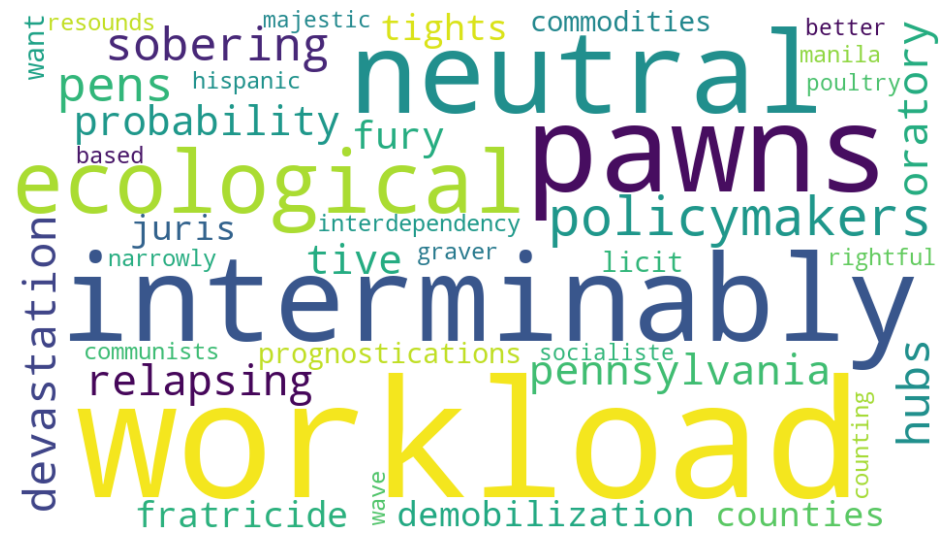

In [22]:
# Call the wordcloud_topics function with parameters
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [23]:
# Initialize an empty list to store the names of the topics.
topic_names = []

# Get the feature names from the TF-IDF vectorizer used in the NMF model.
voc = tfidf_para_vectorizer.get_feature_names_out()

# Iterate over each topic in the NMF model's components.
for topic in nmf_para_model.components_:
    # Get the indices of words sorted by importance within the topic.
    important = topic.argsort()
    
    # Extract the two most important words (with highest weights) from the vocabulary.
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    
    # Create a topic name by concatenating "Topic " with the two most important words.
    topic_names.append("Topic " + top_word)


# Seperate data by year

In [24]:
# Import necessary libraries.
from tqdm.auto import tqdm  # For displaying progress bars
import numpy as np  # For numerical operations

# Initialize an empty list to store the data for each year.
year_data = []

# Get unique years from the "year" column of the paragraph dataframe.
unique_years = np.unique(paragraph_df["year"])

# Iterate over each unique year, tracking progress with tqdm.
for year in tqdm(unique_years):
    # Create a boolean mask for samples belonging to the current year.
    year_indices = np.array(paragraph_df["year"] == year)
    
    # Check if there are samples available for the current year.
    if np.any(year_indices):
        # Transform the TF-IDF vectors of paragraphs from the current year using the NMF model.
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        
        # Calculate the sum of probabilities for each topic across all documents for the current year,
        # then normalize the sums to get the percentage contribution of each topic.
        year_topic_distribution = W_year.sum(axis=0) / W_year.sum() * 100.0
        
        # Append the year along with its corresponding topic distribution to the year_data list.
        year_data.append([year] + list(year_topic_distribution))


  0%|          | 0/46 [00:00<?, ?it/s]

# Drawing time chart

<Axes: xlabel='year'>

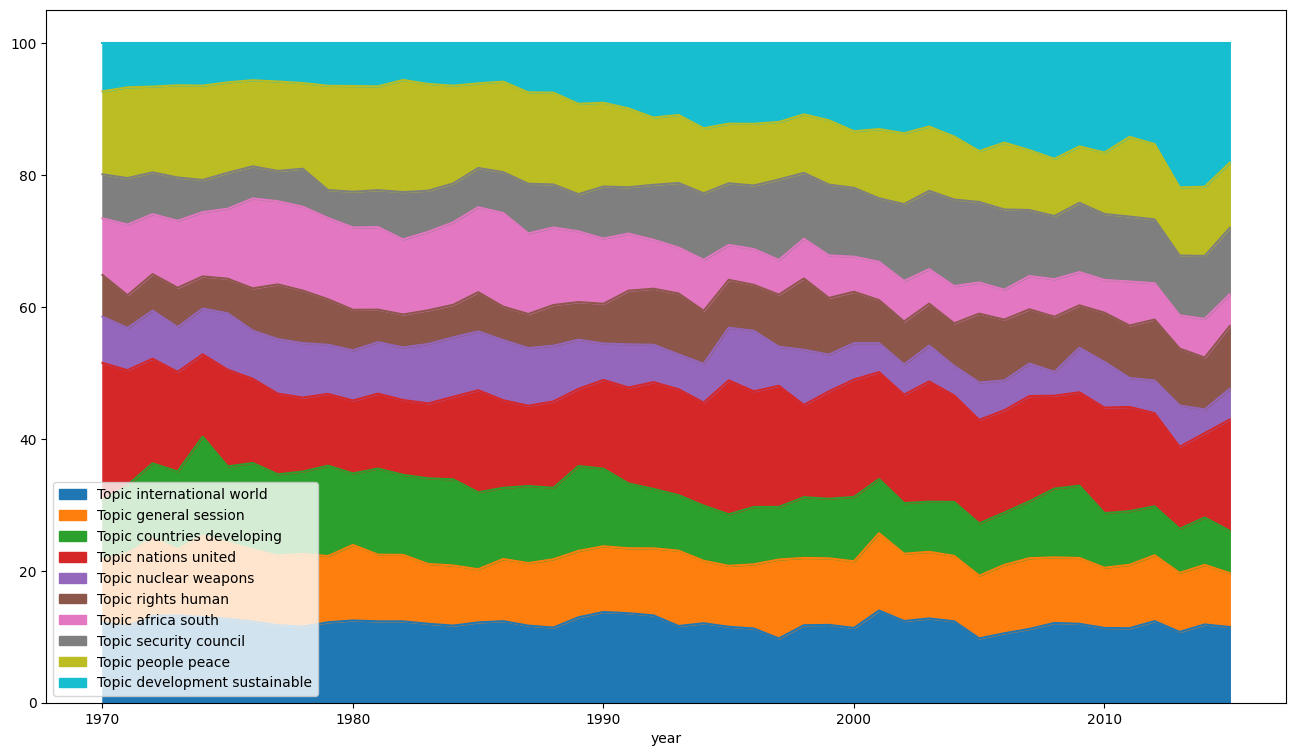

In [25]:
# Import the matplotlib library for visualization.
import matplotlib.pyplot as plt

# Import pandas library for data manipulation and analysis.
import pandas as pd

# Create a DataFrame 'df_year' from the 'year_data' list, with columns as topic names and index as years.
df_year = pd.DataFrame(year_data, columns=["year"] + topic_names).set_index("year")

# Plot an area plot for the DataFrame 'df_year' with years on the x-axis and topic distributions on the y-axis.
# figsize=(16,9) sets the size of the plot.
df_year.plot.area(figsize=(16,9))
